# Librairies


In [ ]:
# Essential Libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization

# Import the data

In [ ]:
# Importing the csv file
file_path = 'marketing_campaign.csv'
df = pd.read_csv(file_path, delimiter="\t")

# Displaying the firstlines and columns of the dataset
print(df.head())
print(df.columns)
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

# Data Cleaning

In [ ]:
# Handle Missing Values

# Convert negative values in numeric columns to NaN
numeric_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth']
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

# Fill missing values with the mode (most frequent value) of each column
df.fillna(df.mode().iloc[0], inplace=True)


In [ ]:
# Drop columns with more than 90% of 0
high_zero_columns = df.columns[(df == 0).mean() > 0.9]
print("Columns mostly filled with zeros:", high_zero_columns)
df.drop(columns=high_zero_columns, inplace=True)
print(df.columns)

Columns mostly filled with zeros: Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [ ]:
# Correct Inconsistencies:

# Standardize date formats:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
# Fix typos and errors in the data:
print(df['Education'].unique())
df['Education'] = df['Education'].replace({'PhD': 'Doctorate', 'Basic': 'Primary', 'Master': 'Graduate', '2n Cycle':'2nd Cycle'})

print(df['Marital_Status'].unique())
mode_marital_status = df['Marital_Status'].mode()[0]

df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': mode_marital_status,
    'YOLO': mode_marital_status
})


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
# Handling Outliers

# Exclude irrelevant columns for this cleaning (ID, categories)
excluded_cols = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Income_Category']
numeric_cols = [col for col in df.columns if col not in excluded_cols]

# Calculate the quartiles and IQR (Interquartile Range) for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers (1.5 * IQR outside the quartiles)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping to all numeric columns to limit values within the bounds
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))

# Check the results
print(df[numeric_cols].describe())





              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    51400.091071     0.444196     0.506250    49.109375   302.112946   
std     21442.454158     0.538398     0.544538    28.962453   331.057356   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     34722.000000     0.000000     0.000000    24.000000    23.750000   
50%     51075.000000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    118641.375000     2.000000     2.000000    99.000000  1225.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     21.679018       150.873214        32.115848         21.937946   
std      27.257348       178.816658        40.361485         27.540334   
min       0.000000 

In [ ]:
# Feature creation
# Create 'Children' column by summing 'Kidhome' and 'Teenhome'
df['Children'] = df['Kidhome'] + df['Teenhome']

# Calculate customer age from 'Year_Birth'
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Assurer le format datetime
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

# Vérifier et corriger les âges aberrants (si l'âge est < 0 ou > 100)
df.loc[df['Customer_Age'] < 0, 'Customer_Age'] = 0  # Remplacer les âges < 0 par 0
df.loc[df['Customer_Age'] > 100, 'Customer_Age'] = 100  # Remplacer les âges > 100 par 100



# Loyalty score based on purchase channels
df['Loyalty_Score'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']

# Carbon impact per product (kg CO2 per kg)
carbon_impact = {
    'MntFruits': 0.5,
    'MntFishProducts': 5,
    'MntMeatProducts': 27,
    'MntSweetProducts': 3
}

# Eco-friendly score (lower CO2 = higher score)
df['Eco_Friendly_Score'] = (df['MntFruits'] * (1 / carbon_impact['MntFruits']) + \
                           df['MntFishProducts'] * (1 / carbon_impact['MntFishProducts']) + \
                           df['MntMeatProducts'] * (1 / carbon_impact['MntMeatProducts']) + \
                           df['MntSweetProducts'] * (1 / carbon_impact['MntSweetProducts'])).round(2)

# Recency score based on days since last interaction
df['Recency_Score'] = df['Recency']

# Spending ratio based on total spend vs income
df['Spending_Ratio'] = ((df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']) / df['Income']).round(2)

# Categorize income into brackets
df['Income_Category'] = pd.cut(df['Income'],
                               bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Customer_Age',
       'Loyalty_Score', 'Eco_Friendly_Score', 'Recency_Score',
       'Spending_Ratio', 'Income_Category'],
      dtype='object')


In [ ]:
# Remove Duplicates and Irrelevant Data:

# Remove duplicates:
df.drop_duplicates(inplace=True)

In [ ]:
# Saving the cleaned data

# Save the cleaned dataset to a new CSV file:
print(df.info())
df.to_csv('cleaned_dataset2.csv', index=False)
print(df.head())

# See if the cleaned dataset has been created (can be seen in the content directory of google colab)
!ls /content/




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

# Basic Visualisations


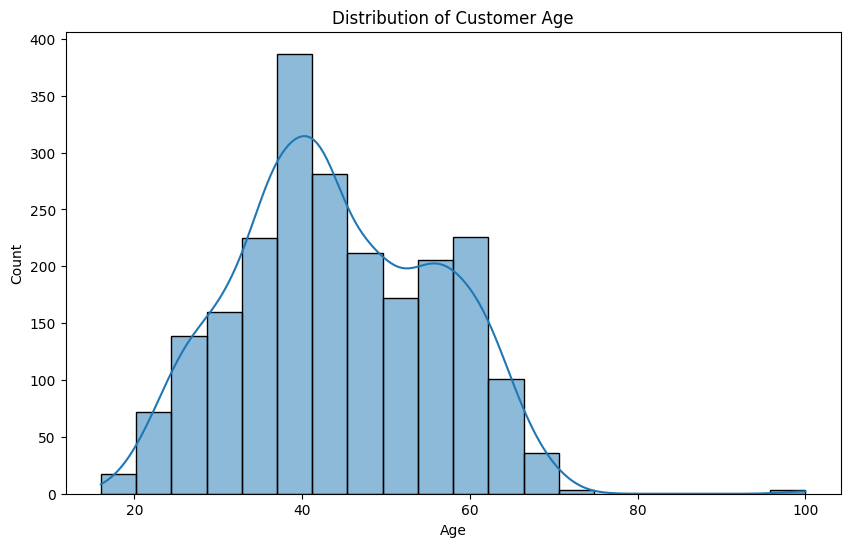

In [ ]:
# Plot histogram of customer age
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

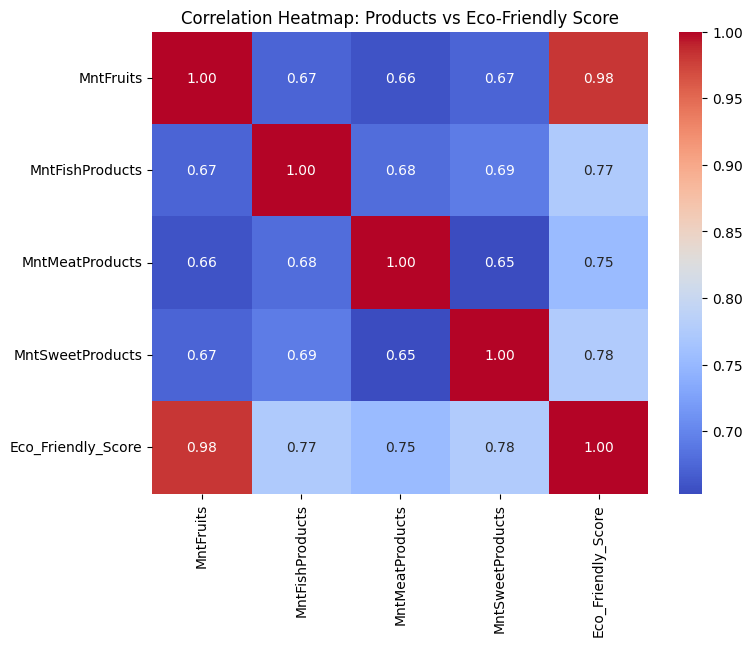

In [ ]:
corr = df[['MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'Eco_Friendly_Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Products vs Eco-Friendly Score')
plt.show()


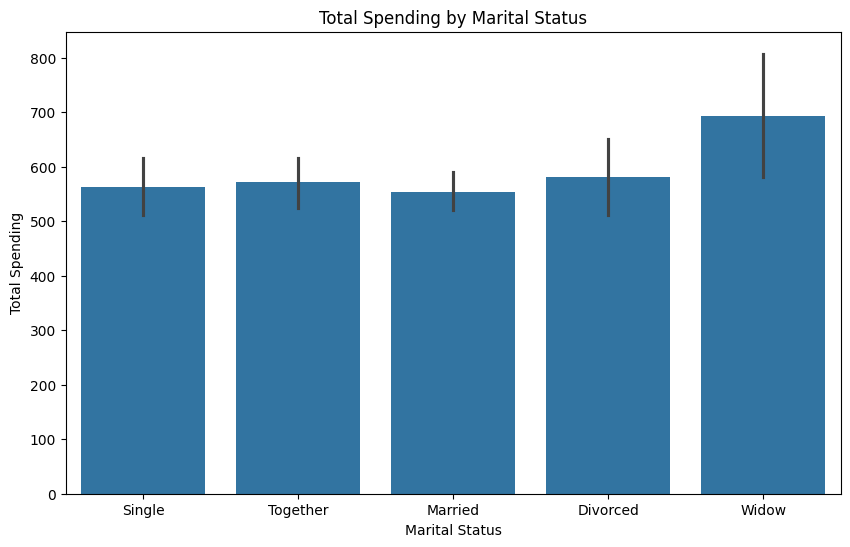

In [ ]:
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Total_Spending', data=df)
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()


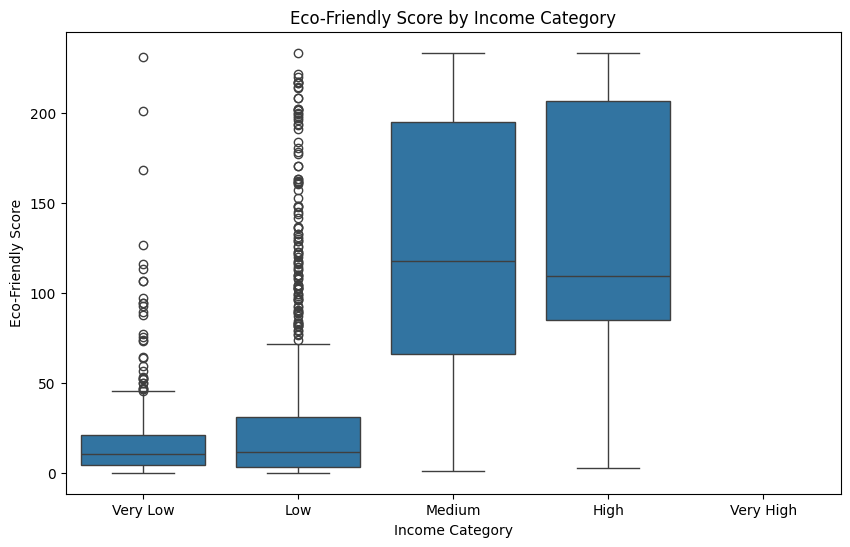

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Category', y='Eco_Friendly_Score', data=df)
plt.title('Eco-Friendly Score by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Eco-Friendly Score')
plt.show()


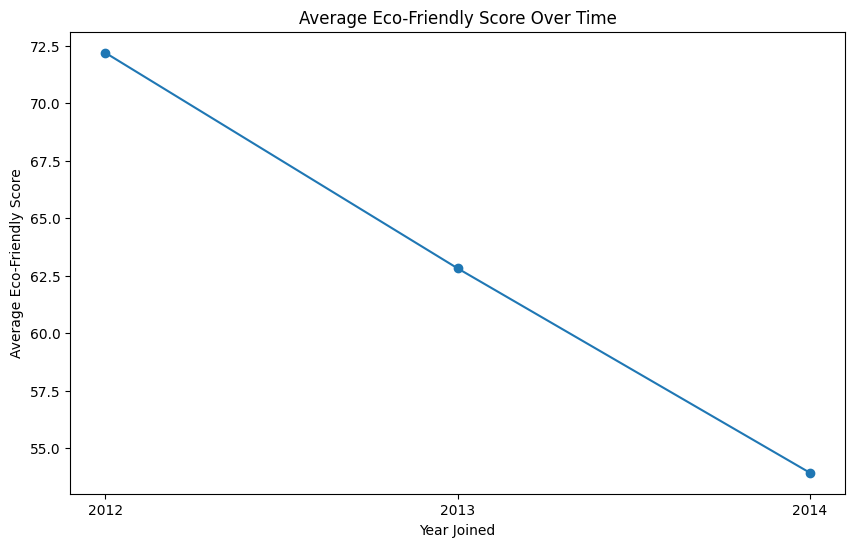

In [ ]:
# Extraire uniquement l'année entière de 'Dt_Customer' et en faire une valeur entière
df['Year_Joined'] = df['Dt_Customer'].dt.year

# Calculer la moyenne du score éco-responsable par année
avg_eco_score_by_year = df.groupby('Year_Joined')['Eco_Friendly_Score'].mean()

# Afficher le graphique
plt.figure(figsize=(10, 6))
avg_eco_score_by_year.plot(kind='line', marker='o')
plt.title('Average Eco-Friendly Score Over Time')
plt.xlabel('Year Joined')
plt.ylabel('Average Eco-Friendly Score')

# Enlever les décimales de l'axe X
plt.xticks(range(int(df['Year_Joined'].min()), int(df['Year_Joined'].max())+1))

plt.show()


<ipython-input-77-4cd763f99181>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Eco_Friendly_Score'].mean().plot(kind='bar', color='teal')


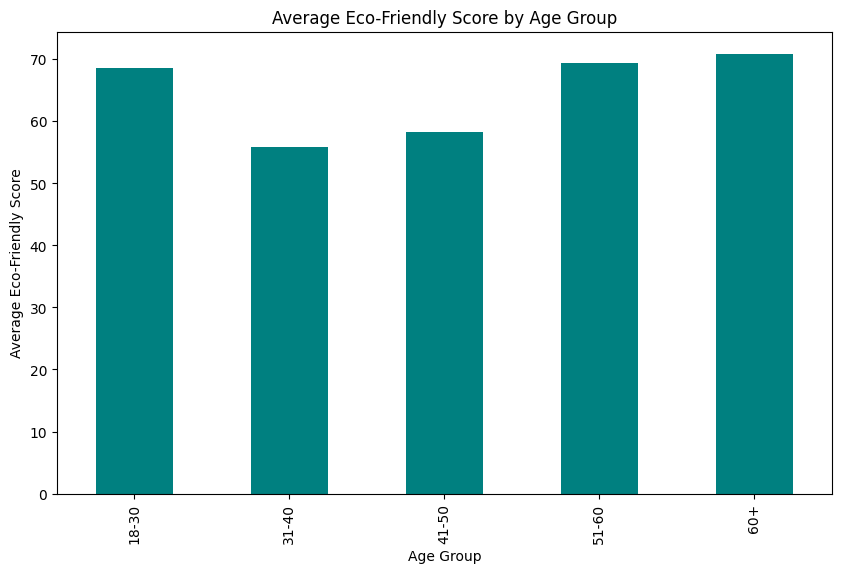

In [ ]:
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(10, 6))
df.groupby('Age_Group')['Eco_Friendly_Score'].mean().plot(kind='bar', color='teal')
plt.title('Average Eco-Friendly Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Eco-Friendly Score')
plt.show()


<ipython-input-78-82085e8e6464>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_Category')['Spending_Ratio'].mean().plot(kind='bar', color='coral')


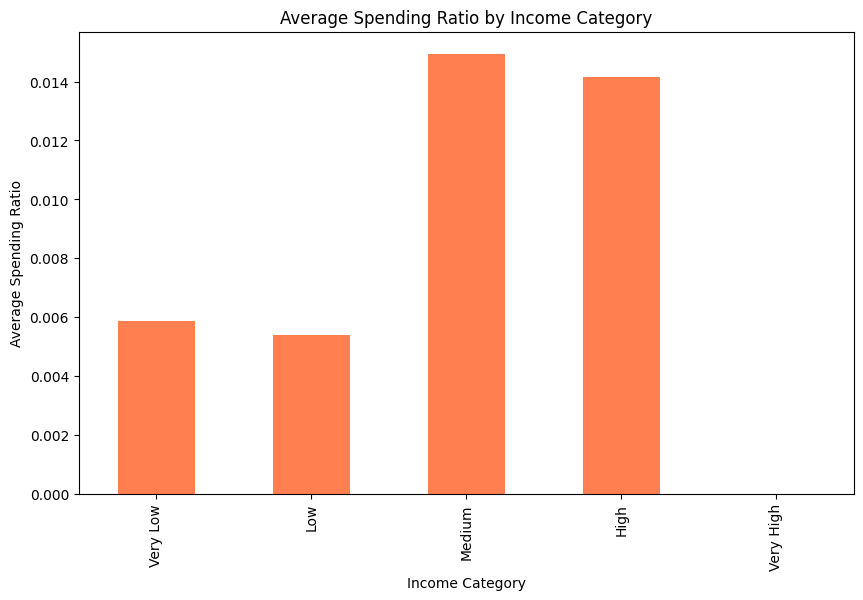

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Income_Category')['Spending_Ratio'].mean().plot(kind='bar', color='coral')
plt.title('Average Spending Ratio by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Spending Ratio')
plt.show()


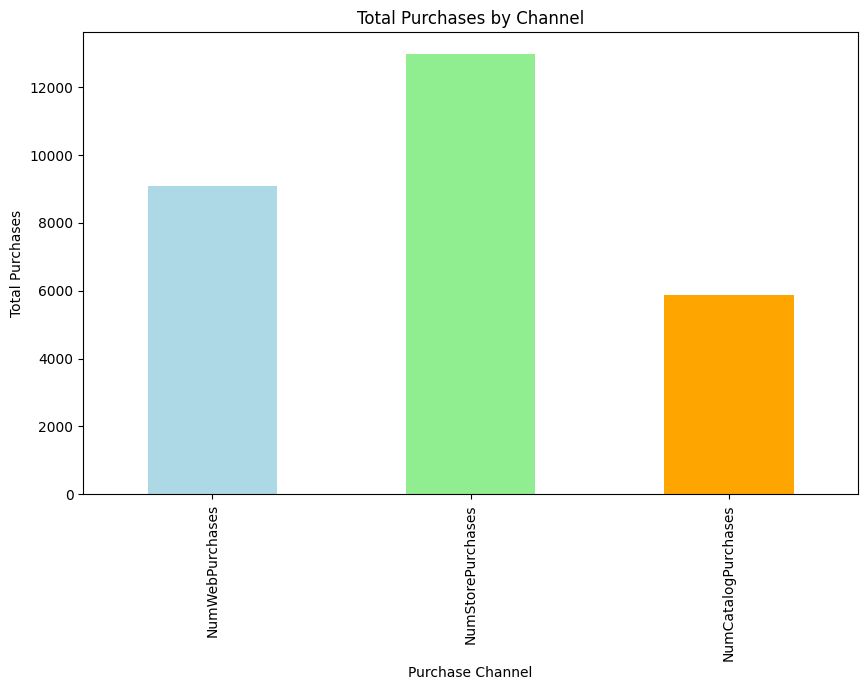

In [ ]:
df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].sum().plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'orange'])
plt.title('Total Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Total Purchases')
plt.show()


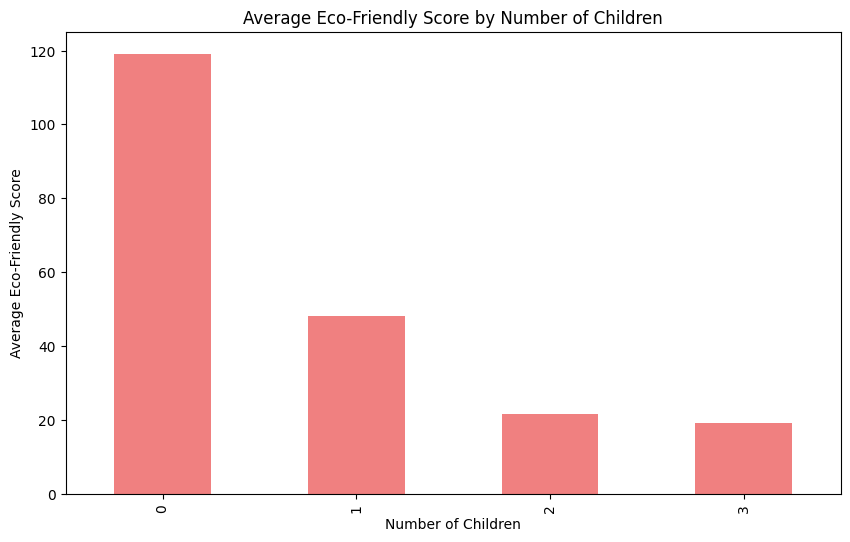

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Children')['Eco_Friendly_Score'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Eco-Friendly Score by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Eco-Friendly Score')
plt.show()
